In [ ]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt


In [ ]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [ ]:
X_train.shape,X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
y_train.shape,y_train[5]

((50000, 1), array([1], dtype=uint8))

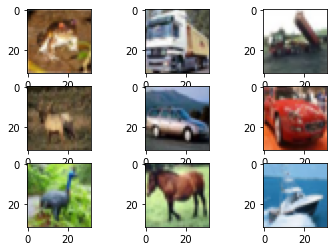

In [ ]:
for i in range(9):
  plt.subplot(331+i)
  plt.imshow(X_train[i])
plt.show()

**Simple cnn**

In [ ]:
import pandas as pd
import numpy as np
from keras.layers import Dense,Convolution2D,Dropout,MaxPooling2D,Flatten
from keras.models import Sequential
from keras.utils import np_utils
from keras.optimizers import SGD

In [ ]:
seed =7
np.random.seed(seed)

(X_train,y_train),(X_test,y_test)=cifar10.load_data()

X_train=X_train.astype("float")
X_test=X_test.astype("float")

X_train=X_train/255
X_test=X_test/255

y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

num_class=y_test.shape[1]

"""Constraining the weight matrix directly is another kind of regularization.
 If you use a simple L2 regularization term you penalize high weights with your loss function.
  With this constraint, you regularize directly. As also linked in the keras code, 
  this seems to work especially well in combination with a dropoutlayer. """
from keras.constraints import maxnorm
def simple_cnn():
  model=Sequential()
  model.add(Convolution2D(32,5,5,activation="relu",input_shape=(32,32,3),kernel_initializer="normal",border_mode="same",W_constraint=maxnorm(3)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(.2))
  model.add(Flatten())

  model.add(Dense(256,activation="relu"))
  model.add(Dense(num_class,activation="softmax"))

  return model

epochs=25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model=simple_cnn()
model.compile(loss= "categorical_crossentropy" , optimizer=sgd, metrics=[ "accuracy" ])
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_16 (Dense)             (None, 10)                2570      
Total params: 2,102,410
Trainable params: 2,102,410
Non-trainable params: 0
___________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu", input_shape=(32, 32, 3..., kernel_initializer="normal", padding="same", kernel_constraint=<keras.con...)`


In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=250,verbose=2,shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
 - 4s - loss: 1.8600 - accuracy: 0.3308 - val_loss: 1.5730 - val_accuracy: 0.4444
Epoch 2/25
 - 4s - loss: 1.4762 - accuracy: 0.4736 - val_loss: 1.3841 - val_accuracy: 0.5037
Epoch 3/25
 - 4s - loss: 1.3348 - accuracy: 0.5252 - val_loss: 1.2801 - val_accuracy: 0.5475
Epoch 4/25
 - 4s - loss: 1.2647 - accuracy: 0.5544 - val_loss: 1.2403 - val_accuracy: 0.5646
Epoch 5/25
 - 4s - loss: 1.1977 - accuracy: 0.5761 - val_loss: 1.1782 - val_accuracy: 0.5873
Epoch 6/25
 - 4s - loss: 1.1414 - accuracy: 0.5989 - val_loss: 1.1395 - val_accuracy: 0.5988
Epoch 7/25
 - 4s - loss: 1.0965 - accuracy: 0.6140 - val_loss: 1.1230 - val_accuracy: 0.6033
Epoch 8/25
 - 4s - loss: 1.0487 - accuracy: 0.6308 - val_loss: 1.1074 - val_accuracy: 0.6065
Epoch 9/25
 - 4s - loss: 1.0154 - accuracy: 0.6459 - val_loss: 1.0689 - val_accuracy: 0.6203
Epoch 10/25
 - 4s - loss: 0.9729 - accuracy: 0.6594 - val_loss: 1.0631 - val_accuracy: 0.6247
Epoch 11/25
 - 4s -

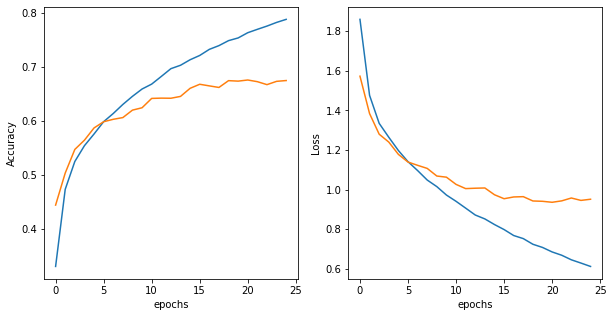

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("epochs")
plt.ylabel("Accuracy")

plt.subplot(122)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("Loss")

plt.show()

**Medium size cnn with some modeification**


In [ ]:
def medium_cnn():
  model=Sequential()
  model.add(Convolution2D(32,3,3,activation="relu",input_shape=(32,32,3),kernel_initializer="normal",border_mode="same",W_constraint=maxnorm(3)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Convolution2D(32,3,3,activation="relu",kernel_initializer="normal",border_mode="same",W_constraint=maxnorm(3)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(.2))
  model.add(Flatten())

  model.add(Dense(512,activation="relu"))
  model.add(Dropout(.5))
  model.add(Dense(num_class,activation="softmax"))

  return model

epochs=25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model=medium_cnn()
model.compile(loss= "categorical_crossentropy" , optimizer=sgd, metrics=[ "accuracy" ])
print(model.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)             

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3..., kernel_initializer="normal", padding="same", kernel_constraint=<keras.con...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", kernel_initializer="normal", padding="same", kernel_constraint=<keras.con...)`
  """


In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=250,verbose=2,shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
 - 4s - loss: 2.0627 - accuracy: 0.2426 - val_loss: 1.7779 - val_accuracy: 0.3782
Epoch 2/25
 - 4s - loss: 1.7253 - accuracy: 0.3772 - val_loss: 1.5673 - val_accuracy: 0.4462
Epoch 3/25
 - 4s - loss: 1.5772 - accuracy: 0.4317 - val_loss: 1.4303 - val_accuracy: 0.4902
Epoch 4/25
 - 4s - loss: 1.4802 - accuracy: 0.4650 - val_loss: 1.3461 - val_accuracy: 0.5246
Epoch 5/25
 - 4s - loss: 1.4121 - accuracy: 0.4914 - val_loss: 1.2798 - val_accuracy: 0.5482
Epoch 6/25
 - 4s - loss: 1.3515 - accuracy: 0.5157 - val_loss: 1.2390 - val_accuracy: 0.5649
Epoch 7/25
 - 4s - loss: 1.3113 - accuracy: 0.5328 - val_loss: 1.1984 - val_accuracy: 0.5744
Epoch 8/25
 - 4s - loss: 1.2663 - accuracy: 0.5461 - val_loss: 1.1580 - val_accuracy: 0.5932
Epoch 9/25
 - 4s - loss: 1.2373 - accuracy: 0.5601 - val_loss: 1.1377 - val_accuracy: 0.6022
Epoch 10/25
 - 4s - loss: 1.2052 - accuracy: 0.5703 - val_loss: 1.1538 - val_accuracy: 0.5989
Epoch 11/25
 - 4s -

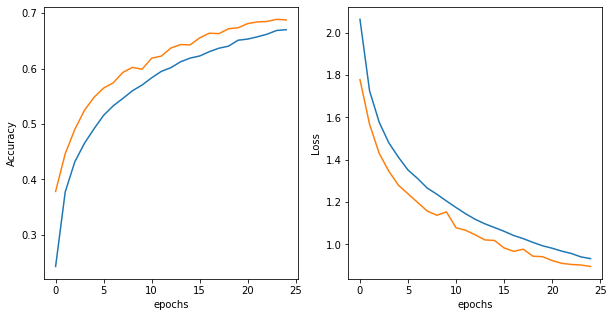

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("epochs")
plt.ylabel("Accuracy")

plt.subplot(122)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("Loss")

plt.show()
### no overfitting but less accuracy

**Lagre cnn**

In [ ]:
def large_cnn():
  model=Sequential()
  model.add(Convolution2D(32,5,5,activation="relu",input_shape=(32,32,3),kernel_initializer="normal",border_mode="same",W_constraint=maxnorm(3)))
  model.add(Convolution2D(32,5,5,activation="relu",kernel_initializer="normal",border_mode="same",W_constraint=maxnorm(3)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(.2))

  model.add(Convolution2D(64,5,5,activation="relu",kernel_initializer="normal",border_mode="same",W_constraint=maxnorm(3)))
  model.add(Convolution2D(64,5,5,activation="relu",kernel_initializer="normal",border_mode="same",W_constraint=maxnorm(3)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(.2))

  model.add(Convolution2D(128,5,5,activation="relu",kernel_initializer="normal",border_mode="same",W_constraint=maxnorm(3)))
  model.add(Convolution2D(128,5,5,activation="relu",kernel_initializer="normal",border_mode="same",W_constraint=maxnorm(3)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(.2))

  model.add(Flatten())
  model.add(Dense(1056,activation="relu", W_constraint=maxnorm(3)))
  model.add(Dropout(.2))
  model.add(Dense(512,activation="relu", W_constraint=maxnorm(3)))
  model.add(Dropout(.3))
  model.add(Dense(256,activation="relu", W_constraint=maxnorm(3)))
  model.add(Dropout(.2))
  model.add(Dense(num_class,activation="softmax"))

  return model

epochs=25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model=large_cnn()
model.compile(loss= "categorical_crossentropy" , optimizer=sgd, metrics=[ "accuracy" ])
print(model.summary())

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 16, 16, 64)        51264     
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 16, 16, 64)        102464    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 8, 8, 64)        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu", input_shape=(32, 32, 3..., kernel_initializer="normal", padding="same", kernel_constraint=<keras.con...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu", kernel_initializer="normal", padding="same", kernel_constraint=<keras.con...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), activation="relu", kernel_initializer="normal", padding="same", kernel_constraint=<keras.con...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `C

In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=250,verbose=2,shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
 - 22s - loss: 2.1725 - accuracy: 0.1909 - val_loss: 2.0628 - val_accuracy: 0.2534
Epoch 2/25
 - 21s - loss: 1.9036 - accuracy: 0.2898 - val_loss: 1.6677 - val_accuracy: 0.3809
Epoch 3/25
 - 21s - loss: 1.6533 - accuracy: 0.3806 - val_loss: 1.4952 - val_accuracy: 0.4497
Epoch 4/25
 - 21s - loss: 1.5132 - accuracy: 0.4378 - val_loss: 1.4026 - val_accuracy: 0.4852
Epoch 5/25
 - 21s - loss: 1.4104 - accuracy: 0.4844 - val_loss: 1.2931 - val_accuracy: 0.5308
Epoch 6/25
 - 21s - loss: 1.3211 - accuracy: 0.5182 - val_loss: 1.2132 - val_accuracy: 0.5617
Epoch 7/25
 - 21s - loss: 1.2478 - accuracy: 0.5515 - val_loss: 1.1493 - val_accuracy: 0.5860
Epoch 8/25
 - 21s - loss: 1.1865 - accuracy: 0.5735 - val_loss: 1.0861 - val_accuracy: 0.6122
Epoch 9/25
 - 21s - loss: 1.1366 - accuracy: 0.5922 - val_loss: 1.1053 - val_accuracy: 0.6068
Epoch 10/25
 - 21s - loss: 1.0653 - accuracy: 0.6188 - val_loss: 1.0539 - val_accuracy: 0.6314
Epoch 11/

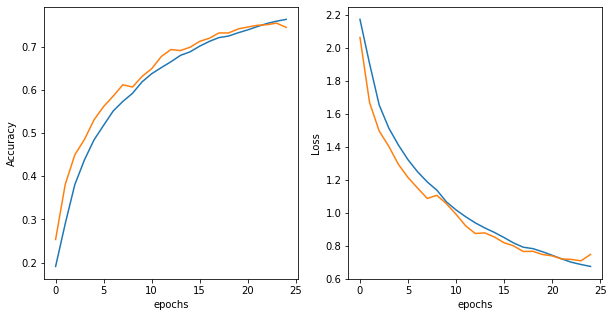

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("epochs")
plt.ylabel("Accuracy")

plt.subplot(122)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("Loss")

plt.show()

### good model in term of 

In [ ]:
"""Train for More Epochs. Each model was trained for a very small number of epochs,
25. It is common to train large convolutional neural networks for hundreds or thousands
of epochs. I would expect that performance gains can be achieved by significantly raising
the number of training epochs.
Image Data Augmentation. The objects in the image vary in their position. Another
boost in model performance can likely be achieved by using some data augmentation.
Methods such as standardization and random shifts and horizontal image flips may be
beneficial.
Deeper Network Topology. The larger network presented is deep, but larger networks
could be designed for the problem. This may involve more feature maps closer to the
input and perhaps less aggressive pooling. Additionally, standard convolutional network
topologies that have been shown useful may be adopted and evaluated on the problem."""